In [ ]:
#from milliontrees.common.data_loaders import get_train_loader
#from milliontrees.datasets.TreeBoxes import TreeBoxesDataset
#from milliontrees.datasets.TreePoints import TreePointsDataset
#from milliontrees.datasets.TreePolygons import TreePolygonsDataset
#import pandas as pd


## boxes

#dataBoxes = TreeBoxesDataset(download=True,mini=True)
#trainBoxes = dataBoxes.get_subset("train")
#train_loaderBoxes = get_train_loader("standard", trainBoxes, batch_size=2)

#splitBoxes = pd.read_csv("data/TreeBoxes_v0.10/random.csv") 


## points

#dataPoints = TreePointsDataset(download=True,mini=True)
#trainPoints = dataPoints.get_subset("train")
#train_loaderPoints = get_train_loader("standard", trainPoints, batch_size=2)

## polygons

#dataPolygons = TreePolygonsDataset(download=True,mini=True)
#trainPolygons = dataPolygons.get_subset("train")
#train_loaderPolygons = get_train_loader("standard", trainPolygons, batch_size=2)



  0%|          | 59998208/42922274383 [00:10<2:03:11, 5799173.43Byte/s] 


Extracting data/TreeBoxes_v0.10/archive.zip to data/TreeBoxes_v0.10

It took 0.18 minutes to download and uncompress the dataset.



In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from milliontrees.datasets.TreeBoxes import TreeBoxesDataset


In [4]:
dataBoxes = TreeBoxesDataset(download=True, mini=True)
trainBoxes = dataBoxes.get_subset("train")

split_path = "data/TreeBoxes_v0.10/random.csv"
split_df = pd.read_csv(split_path)
    
print("Number of rows in split:", len(split_df))


  0%|          | 59998208/42922274383 [00:17<3:24:17, 3496800.11Byte/s]


Extracting data/TreeBoxes_v0.10/archive.zip to data/TreeBoxes_v0.10

It took 0.29 minutes to download and uncompress the dataset.

Number of rows in split: 5294


In [5]:
split_df.head()

,filename,xmin,ymin,xmax,ymax,geometry,label,source,Unnamed: 0,existing_split,...,tile_name,metadata,treeID,Z,complete,basename,remove,image_path,annotator,split
0,5032-6-6.png,40.0,0.0,109.0,61.0,"POLYGON ((109 0, 109 61, 40 61, 40 0, 109 0))",Tree,Sun et al. 2022,NaN,NaN,...,NaN,NaN,NaN,NaN,True,5032-6-6.png,NaN,NaN,NaN,train
1,5032-6-6.png,102.0,0.0,144.0,41.0,"POLYGON ((144 0, 144 41, 102 41, 102 0, 144 0))",Tree,Sun et al. 2022,NaN,NaN,...,NaN,NaN,NaN,NaN,True,5032-6-6.png,NaN,NaN,NaN,train
2,5032-6-6.png,139.0,0.0,175.0,34.0,"POLYGON ((175 0, 175 34, 139 34, 139 0, 175 0))",Tree,Sun et al. 2022,NaN,NaN,...,NaN,NaN,NaN,NaN,True,5032-6-6.png,NaN,NaN,NaN,train
3,5032-6-6.png,171.0,0.0,201.0,25.0,"POLYGON ((201 0, 201 25, 171 25, 171 0, 201 0))",Tree,Sun et al. 2022,NaN,NaN,...,NaN,NaN,NaN,NaN,True,5032-6-6.png,NaN,NaN,NaN,train
4,5032-6-6.png,168.0,22.0,208.0,51.0,"POLYGON ((208 22, 208 51, 168 51, 168 22, 208 ...",Tree,Sun et al. 2022,NaN,NaN,...,NaN,NaN,NaN,NaN,True,5032-6-6.png,NaN,NaN,NaN,train


In [8]:
row = split_df.iloc[0]  # or filter by split_df[split_df["split"]=="train"].iloc[0]
print("Selected row:")
print(row)

image_filename = row["filename"]
xmin = float(row["xmin"])
ymin = float(row["ymin"])
xmax = float(row["xmax"])
ymax = float(row["ymax"])

images_dir = os.path.join("data", "TreeBoxes_v0.10", "images")
image_path = os.path.join(images_dir, image_filename)

print("Image path:", image_path)
assert os.path.exists(image_path), f"Image not found: {image_path}"



Selected row:
filename                                            5032-6-6.png
xmin                                                        40.0
ymin                                                         0.0
xmax                                                       109.0
ymax                                                        61.0
geometry           POLYGON ((109 0, 109 61, 40 61, 40 0, 109 0))
label                                                       Tree
source                                           Sun et al. 2022
Unnamed: 0                                                   NaN
existing_split                                               NaN
individual                                                   NaN
classifica                                                   NaN
user_name                                                    NaN
created_at                                                   NaN
subject_id                                                   NaN
image_name 

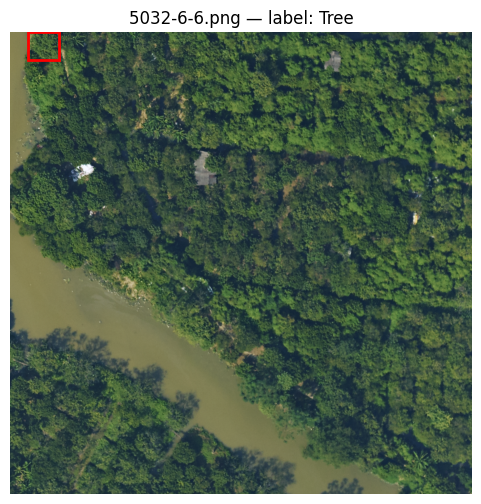

In [9]:
img = plt.imread(image_path)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.set_title(f"{image_filename} — label: {row['label']}")


width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle(
    (xmin, ymin),
    width,
    height,
    linewidth=2,
    edgecolor="red",
    facecolor="none",
)
ax.add_patch(rect)

ax.axis("off")
plt.show()


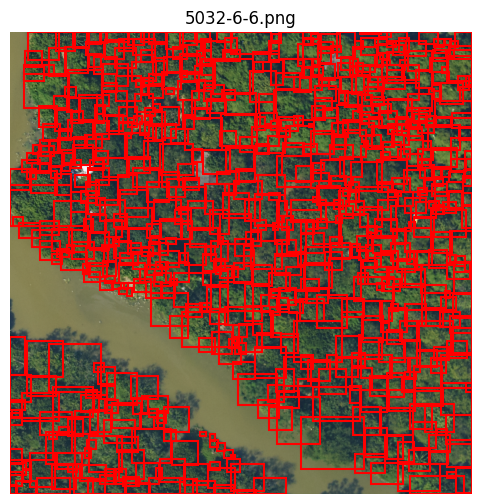

In [10]:
rows = split_df[split_df["filename"] == image_filename]

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.set_title(image_filename)

for _, r in rows.iterrows():
    xmin, ymin, xmax, ymax = r[["xmin", "ymin", "xmax", "ymax"]].astype(float)
    rect = patches.Rectangle(
        (xmin, ymin),
        xmax - xmin,
        ymax - ymin,
        linewidth=1.5,
        edgecolor="red",
        facecolor="none",
    )
    ax.add_patch(rect)

ax.axis("off")
plt.show()
